In [1]:
cd g:/dd-resource/slides/homework/ML_project/project/

g:\dd-resource\slides\homework\ML_project\project


In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def dummy_F(df,dummy_fields):
    for each in dummy_fields:
        dummies = pd.get_dummies( df.loc[:, each], prefix=each ) 
        df = pd.concat( [df, dummies], axis = 1 )
        df.pop(each)
    return df


def assign_integer(train):
    single = train[(train.marital == 'single')].index.values
    married = train[(train.marital == 'married')].index.values
    divorced = train[(train.marital == 'divorced')].index.values
    
    train.loc[single, 'marital'] = int(1)
    train.loc[married, 'marital'] = int(2)
    train.loc[divorced, 'marital'] = int(3)
    
    admin = train[(train.profession == 'admin.')].index.values
    bluecollar = train[(train.profession == 'blue-collar')].index.values
    entrepreneur = train[(train.profession == 'entrepreneur')].index.values
    housemaid = train[(train.profession == 'housemaid')].index.values
    management = train[(train.profession == 'management')].index.values
    retired = train[(train.profession == 'retired')].index.values
    selfemployed = train[(train.profession == 'self-employed')].index.values
    services = train[(train.profession == 'services')].index.values
    student = train[(train.profession == 'student')].index.values
    technician = train[(train.profession == 'technician')].index.values
    unemployed = train[(train.profession == 'unemployed')].index.values


    train.loc[admin, 'profession'] = int(1)
    train.loc[bluecollar, 'profession'] = int(2)
    train.loc[entrepreneur, 'profession'] = int(3)
    train.loc[housemaid, 'profession'] = int(4)
    train.loc[management, 'profession'] = int(5)
    train.loc[retired, 'profession'] = int(6)
    train.loc[selfemployed, 'profession'] = int(7)
    train.loc[services, 'profession'] = int(8)
    train.loc[student, 'profession'] = int(9)
    train.loc[technician, 'profession'] = int(10)
    train.loc[unemployed, 'profession'] = int(11)


    basic4y = train[(train.schooling == 'basic.4y')].index.values
    basic6y = train[(train.schooling == 'basic.6y')].index.values
    basic9y = train[(train.schooling == 'basic.9y')].index.values
    highschool = train[(train.schooling == 'high.school')].index.values
    illiterate = train[(train.schooling == 'illiterate')].index.values
    prof = train[(train.schooling == 'professional.course')].index.values
    uni = train[(train.schooling == 'university.degree')].index.values


    train.loc[basic4y, 'schooling'] = int(1)
    train.loc[basic6y, 'schooling'] = int(2)
    train.loc[basic9y, 'schooling'] = int(3)
    train.loc[highschool, 'schooling'] = int(4)
    train.loc[illiterate, 'schooling'] = int(5)
    train.loc[prof, 'schooling'] = int(6)
    train.loc[uni, 'schooling'] = int(7)

    fri = train[(train.day_of_week == 'fri')].index.values
    thu = train[(train.day_of_week == 'thu')].index.values
    wed = train[(train.day_of_week == 'wed')].index.values
    tue = train[(train.day_of_week == 'tue')].index.values
    mon = train[(train.day_of_week == 'mon')].index.values


    train.loc[mon, 'day_of_week'] = int(1)
    train.loc[tue, 'day_of_week'] = int(2)
    train.loc[wed, 'day_of_week'] = int(3)
    train.loc[thu, 'day_of_week'] = int(4)
    train.loc[fri, 'day_of_week'] = int(5)

    mar = train[(train.month == 'mar')].index.values
    apr = train[(train.month == 'apr')].index.values
    may = train[(train.month == 'may')].index.values
    jun = train[(train.month == 'jun')].index.values
    jul = train[(train.month == 'jul')].index.values
    aug = train[(train.month == 'aug')].index.values
    sep = train[(train.month == 'sep')].index.values
    oct_ = train[(train.month == 'oct')].index.values
    nov= train[(train.month == 'nov')].index.values
    dec = train[(train.month == 'dec')].index.values


    train.loc[mar, 'month'] = int(3)
    train.loc[apr, 'month'] = int(4)
    train.loc[may, 'month'] = int(5)
    train.loc[jun, 'month'] = int(6)
    train.loc[jul, 'month'] = int(7)
    train.loc[aug, 'month'] = int(8)
    train.loc[sep, 'month'] = int(9)
    train.loc[oct_, 'month'] = int(10)
    train.loc[nov, 'month'] = int(11)
    train.loc[dec, 'month'] = int(12)
    
    train=train.replace("cellular",0)
    train=train.replace("telephone",1)
    
    train=train.replace("nonexistent",0)
    train=train.replace("failure",1)
    train=train.replace("success",2)
    
    return train


def randomTree(x_train, y_train,x_predict,df_original,variable):
    rf=RandomForestRegressor()
    rf.fit(x_train, y_train)
    y_pred = np.around(rf.predict(x_predict))
    ll=pd.isnull(df_original[variable])
    count=0
    index = df_original.columns.tolist().index(variable)
    for i in range(0,df_original.shape[0]-1):
        if (ll[i]):
            df_original.iloc[i,index]=y_pred[count]
            count=count+1
        else:
            continue
    return df_original

In [3]:
def preprocess_data(train,inte):
    train = assign_integer(train)
    
    # get missing data custAge from: profession, marital 
    train2=train
    df_drop = train2[(pd.isnull(train2['marital'])) | (pd.isnull(train2['profession'])) | (pd.isnull(train2['custAge']))]
    train2=train2.drop(df_drop.index)
    train2=train2.iloc[:,0:3]
    
    train2=dummy_F(train2, ['marital','profession'])
    x_train=train2.iloc[:,1:].values
    y_train=train2.iloc[:,0].values

    train2=train
    df_test = train2[(pd.isnull(train2['custAge']))]
    df_test = df_test.iloc[:,0:3]
    df_test=dummy_F(df_test, ['marital','profession'])

    x_predict=df_test.iloc[:,1:].values
    train = randomTree(x_train, y_train,x_predict,train,'custAge')
    
    
    # get missing data marital from: profession, custAge
    if(inte==1):
        train2=train
        df_drop = train2[(pd.isnull(train2['marital'])) | (pd.isnull(train2['profession'])) ]
        train2=train2.drop(df_drop.index)
        train2=train2.iloc[:,0:3]
        train2=dummy_F(train2, ['profession'])
        s1=train2.iloc[:,0].to_frame()
        s2=train2.iloc[:,2:]
        x_train=pd.concat([s1,s2],axis=1)
        y_train=train2.iloc[:,1].values

        train2 = train
        df_test=dummy_F(train2, ['profession'])
        df_test = df_test[(pd.isnull(train2['marital']))]
        s1=df_test.iloc[:,0].to_frame()
        
        s2=df_test.iloc[:,21:]
        x_predict=pd.concat([s1,s2],axis=1).values
        train = randomTree(x_train, y_train,x_predict,train,'marital')
        
    
    # get missing data profession from: marital, custAge, schooling
    train2=train
    df_drop = train2[(pd.isnull(train2['schooling'])) | (pd.isnull(train2['profession'])) ]
    train2=train2.drop(df_drop.index)
    s1=train2.iloc[:,0].to_frame()
    s2=train2.iloc[:,2:4]
    x_train=pd.concat([s1,s2],axis=1).values
    y_train=train2.iloc[:,1].values

    train2 = train
    df_test = train2[(pd.isnull(train2['schooling']))].index.values
    for i in df_test:
        train2.iloc[i,3]=0

    df_test = train2[(pd.isnull(train2['profession']))]
    s1=df_test.iloc[:,0].to_frame()
    s2=df_test.iloc[:,2:4]
    x_predict=pd.concat([s1,s2],axis=1).values
    train = randomTree(x_train, y_train,x_predict,train,'profession')


    # get missing data schooling from: marital, custAge, profession 
    train2=train
    df_drop = train2[(train2.schooling == 0)]
    train2=train2.drop(df_drop.index)
    x_train=train2.iloc[:,0:3].values
    y_train=train2.iloc[:,3].values

    train2=train
    df_test = train2[(train2.schooling == 0)]
    x_predict=df_test.iloc[:,0:3]
    train = randomTree(x_train, y_train,x_predict,train,'schooling')

    
    # get missing data housing loan from: marital, custAge, profession, schooling
    train2=train
    df_drop = train2[(pd.isnull(train2['housing']))]
    train2=train2.drop(df_drop.index)
    x_train=train2.iloc[:,0:4].values
    y_train=train2.iloc[:,5].values

    train2 = train
    df_test = train2[(pd.isnull(train2['housing']))]
    x_predict=df_test.iloc[:,0:4]
    train = randomTree(x_train, y_train,x_predict,train,'housing')

    
    # get missing data personal loan from: marital, custAge, profession, schooling
    train2=train
    df_drop = train2[(pd.isnull(train2['loan']))]
    train2=train2.drop(df_drop.index)
    x_train=train2.iloc[:,0:4].values
    y_train=train2.iloc[:,6].values

    train2 = train
    df_test = train2[(pd.isnull(train2['loan']))]
    x_predict=df_test.iloc[:,0:4]
    train = randomTree(x_train, y_train,x_predict,train,'loan')

    # get missing data: day_of_week
    train2=train
    df_drop = train2[(pd.isnull(train2['day_of_week']))]
    train2=train2.drop(df_drop.index)
    s1=train2.iloc[:,8].to_frame()
    s2=train2.iloc[:,13:18]
    x_train=pd.concat([s1,s2],axis=1)
    y_train=train2.iloc[:,9].values

    train2 = train
    df_test = train2[(pd.isnull(train2['day_of_week']))]
    s1=df_test.iloc[:,8].to_frame()
    s2=df_test.iloc[:,13:18]
    x_predict=pd.concat([s1,s2],axis=1)
    train = randomTree(x_train, y_train,x_predict,train,'day_of_week')

    return train

In [6]:
def cal_chi_square(attr,data,m):
    df1=data.loc[:,attr]
    df2=data.loc[:,'responded']
    
    df=pd.concat([df1,df2],axis=1)
    df=df.replace(np.nan,0)    
    i = df[df[attr]==0]
    x1=i.sum()[1]
    x2=i.shape[0]-x1
    y1=df['responded'].sum()-x1
    y2=m-x1-x2-y1
    return x1,x2,y1,y2,m*((x2*y1-x1*y2)*(x2*y1-x1*y2))/((x1+x2)*(y1+y2)*(x1+y1)*(x2+y2))

In [7]:
dataset = pd.read_csv('DataTraining.csv')
testset = pd.read_csv('DataPredict.csv')
train_data=dataset.replace("unknown",np.nan)
test_data=testset.replace("unknown",np.nan)

train_data=train_data.replace("no",0)
train_data=train_data.replace("yes",1)
test_data=test_data.replace("no",0)
test_data=test_data.replace("yes",1)

train_data.pop("id")
total= train_data.isnull().sum().sort_values(ascending=False)
percent =(train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
m,n=np.shape(train_data) # (8137,23)
K_fields = ['custAge','profession','marital','schooling','default','housing','loan','day_of_week']
K_value=[]
for i in K_fields:
    K_value.append([i, cal_chi_square(i,train_data,m)[4]])
    
K_value

[['custAge', 3.3791997129207223],
 ['profession', 0.49524349766965337],
 ['marital', 1.0610242981939131],
 ['schooling', 2.9712540615799292],
 ['default', 0.11314660013693342],
 ['housing', 0.962579685431598],
 ['loan', 0.52609284124150368],
 ['day_of_week', 2.0569434236488511]]

根据卡方分布只有default可以忽略unknown，但由于default数量太多，因此这里依旧保留。并把unknown视为一种除了no之外的一种属性，yes数据太少可以视作异常忽略。（毕竟test set中default的值也没有yes）

In [8]:
train_data.pop('pdays');
test_data.pop('pdays');
dataset.pop('pdays');

train_processed = preprocess_data(train_data,1)
train_processed.to_csv('new_train.csv')
test_processed = preprocess_data(test_data,0)
test_processed.to_csv('new_test.csv')

train_processed.default[train_data.default.isnull()]=1

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle  
train_processed2 = train_processed
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['custAge', 'campaign', 'pmonths', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
             'euribor3m', 'nr.employed']

train_processed[numerical] = scaler.fit_transform(train_processed[numerical])
train_processed = pd.get_dummies(train_processed)
train_processed = shuffle(train_processed)

import random
random.seed(3434200)
train_profit=train_processed.pop("profit")
# split train/validation and test set
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=10, test_size = 0.2, random_state=18)
for train_index, test_index in split.split(train_processed, train_processed['responded']):
    train_set = train_processed.loc[train_index]
    test_set = train_processed.loc[test_index]

In [10]:
# train_set['profit'].value_counts()
train_set['responded'].value_counts()

0    5857
1     652
Name: responded, dtype: int64

In [11]:
train_set['responded'].value_counts()/len(train_set)
# train_set

0    0.899831
1    0.100169
Name: responded, dtype: float64

In [12]:
test_set['responded'].value_counts()/len(test_set)

0    0.892506
1    0.107494
Name: responded, dtype: float64

In [13]:
# perform upsampling to address sample imbalance
from sklearn.utils import resample
# Separate majority and minority classes
train_negative = train_set[train_set['responded']==0]
train_positive = train_set[train_set['responded']==1]
 
# Upsample minority class
train_positive_upsample = resample(train_positive, 
                                 replace=True,     # sample with replacement
                                 n_samples=5940,    # to match majority class
                                 random_state=18) # reproducible results
 
# Combine majority class with upsampled minority class
train_upsample = pd.concat([train_negative, train_positive_upsample])
 
# Display new class counts
train_upsample['responded'].value_counts()

1    5940
0    5857
Name: responded, dtype: int64

In [14]:
# create X, y for upsampled training and testing
X_train = train_upsample.drop('responded', axis=1)
X_test = test_set.drop('responded', axis=1)
y_train = train_upsample['responded']
y_test = test_set['responded']

In [15]:
# create X, y for imbalanced train set used for performance validation
X_imb = train_set.drop('responded', axis=1)
y_imb = train_set['responded']

# Define Model and Plotting Functions

In [16]:
# create function to fit classifier using GridsearchCV and report metrics score on train dataset
def fit_classifier(model, X, y, parameters=None, scorer_metrics=None):

    # Perform grid search on the classifier using scorer_metrics as the scoring method
    grid_obj = GridSearchCV(estimator = model, param_grid = parameters, scoring=make_scorer(scorer_metrics), cv=10)

    # Fit the grid search object to the training data and find the optimal parameters using fit()
    grid_fit = grid_obj.fit(X, y)

    # Get the estimator
    model_estimator = grid_fit.best_estimator_

    # Report the metrics scores on train data
    model_estimator.fit(X, y)
    y_pred = model_estimator.predict(X)

    print("\n")
    print("\nModel performance on training set\n------------------------")
    print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(y, y_pred)))
    print("Final precision score on training data: {:.4f}".format(precision_score(y, y_pred)))
    print("Final Recall score on training data: {:.4f}".format(recall_score(y, y_pred)))
    print("Final ROC AUC score on training data: {:.4f}".format(roc_auc_score(y, y_pred)))
    print("\n")
    print("The best parameters are: {}".format(model_estimator))

    return model_estimator

In [17]:
# create function to use fitted model to report metrics score on test dataset
# return predicted classification on test dataset
def classifier_test(model_fit, X, y):
    y_pred = model_fit.predict(X)
    print("\n")
    print("\nModel performance on test set\n------------------------")
    print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y, y_pred)))
    print("Final precision score on testing data: {:.4f}".format(precision_score(y, y_pred)))
    print("Final Recall score on testing data: {:.4f}".format(recall_score(y, y_pred)))
    print("Final ROC AUC score on testing data: {:.4f}".format(roc_auc_score(y, y_pred)))
    return y_pred

In [18]:
# create function to plot ROC curve
from sklearn.metrics import roc_curve

def roc_curve_plot(model, X, y,label=None):
    # make sure positive class prediction is in the second column of binary prediction
    if label=='Neural Network':
        y_score = model.predict_proba(X)[:,0]
    else:
        y_score = model.predict_proba(X)[:,1]
    
    # generate ROC curve data
    roc = roc_curve(y, y_score)
    
    plt.plot(roc[0], roc[1], label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
    roc_score = auc(roc[0],roc[1])
    print('AUC score of %s is %.4f.' % (label, roc_score))

In [19]:
# create function to generate the data inputs for Lift plot. Return the lists for accumulative lift,
# population accumulative, and descending predicted probability list
def lift_input(model, X, y, model_name=None):
    # extract the positive probability prediction
    if model_name == 'Neural Network':
        proba_pos = model.predict_proba(X)[:,0]
    else:
        proba_pos = model.predict_proba(X)[:,1]
    # create np.array of positive class label
    actual_pos = np.array(list(y))
    
    # reshape the numpy arrays to (dim, 1) and join the predicted and actual class label to generate 2D array
    joint = np.concatenate([proba_pos.reshape(proba_pos.shape[0],1), actual_pos.reshape(actual_pos.shape[0],1)], 
                           axis=1)
    
    # sort 2D array in ascending order by the column of predicted class probability
    joint_sort=np.sort(joint.view('i8,i8'), order=['f0'], axis=0).view(np.float)
    
    # calculate the number of total sample and positive class
    total_num = len(joint_sort)
    total_positive = sum(joint_sort[:,1]==1)

    # create reverse order of actual class label and result in the order from high to low probability
    positive_reverse = joint_sort[:,1][::-1]
    
    # reverse order of predicted probability in the order from high to low
    # will be used for identifying customarized probability threshold in y_predict_threshold function
    pred_proba_descending = joint_sort[:,0][::-1] 

    # create cumulative response%
    positive_cumulative = 0
    positive_cumulative_list = [0]
    for i in range(len(joint_sort)):
        positive_cumulative = positive_cumulative + positive_reverse[i]/total_positive
        positive_cumulative_list.append(positive_cumulative)
        
    # create cumulative population %
    population_cumulative = 0
    population_cumulative_list = [0]
    for i in range(len(joint_sort)):
        population_cumulative = population_cumulative + i/total_num
        population_cumulative_list.append(i/total_num)
        
    return positive_cumulative_list, population_cumulative_list, pred_proba_descending

In [20]:
# create function to plot Lift chart
from sklearn.metrics import auc

def gain_plot(lift_input, label=None):
    plt.plot(lift_input[1], lift_input[0], label=label)
    plt.plot([0,1],[0,1], 'k--') # reference line for random model
    plt.axis([0,1,0,1])
    plt.xlabel('Population%')
    plt.ylabel('Subscribe%')
    # calculate area under curve
    AUC = auc(lift_input[1], lift_input[0], reorder=False)
    print('AUC score of %s is %.4f.' % (label, AUC))

In [21]:
# create function to calculate and plot lift gain. Return the list of lift gain.
def lift_chart(lift_input, label=None):
    lift_gain_list = []
    # set counter for probability close to 0 (can not be divided) 
    n = 0
    for i in range(0,len(lift_input[0])):
        # exclude 0 probability indices to avoid zero division problem
        if lift_input[1][i]==0:
            n+=1
            continue
        else:
            # calculate lift gain (%response or positive/%population)
            lift_gain_list.append(lift_input[0][i]/lift_input[1][i]) 

    plt.plot(lift_input[1][0:(len(lift_input[1])-n)], lift_gain_list, label=label)
    plt.plot([0,1],[1,1], 'k--') # reference line with no lift gain at all (=1)
    plt.axis([0,1,0,10])
    plt.xlabel('Population%')
    plt.ylabel('Lift Gain')
    return lift_gain_list

In [22]:
# create a function to predict clients likely to subscribe based on the probability threshold defined by
# the desired population% of the clients to be contacted
# top_percent is the desired population percentage for marketing contact, i.e., 0.2 = top 20%
def y_predict_threshold(model, X, y, top_percent, model_name=None):
    lift_input_model = lift_input(model, X, y, model_name=model_name)
    # get the indice of probility threshold meeting top_percent number
    idx = int(len(lift_input_model[2])*top_percent)
    # get the probility threshold for classification cutoff
    threshold_proba = lift_input_model[2][idx]
    
    # list of predicted probability
    if model_name == 'Neural Network':
        y_proba = model.predict_proba(X)[:,0]
    else:
        y_proba = model.predict_proba(X)[:,1]
        
    # 0,1 classification using threshold cutff
    y_predict = (y_proba>=threshold_proba).astype(int)
    return y_predict

In [23]:
# Import metrics scores, GridSearchCV, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [24]:
# Naive Bayes model without GridserachCV
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(X_train, y_train)
y_pred_GNB = model_GNB.predict(X_train)
print("\nGaussian Naive Bayes model on training set\n------------------------")
print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(y_train, y_pred_GNB)))
print("Final precision score on training data: {:.4f}".format(precision_score(y_train, y_pred_GNB)))
print("Final Recall score on training data: {:.4f}".format(recall_score(y_train, y_pred_GNB)))
print("Final ROC AUC score on training data: {:.4f}".format(roc_auc_score(y_train, y_pred_GNB)))

# Report the metrics scores on test data
y_pred_test_GNB = model_GNB.predict(X_test)
print("\n")
print("\nGaussian Naive Bayes model on test set\n------------------------")
print("Final accuracy score on the test data: {:.4f}".format(accuracy_score(y_test, y_pred_test_GNB)))
print("Final Precision score on test data: {:.4f}".format(precision_score(y_test, y_pred_test_GNB)))
print("Final Recall score on test data: {:.4f}".format(recall_score(y_test, y_pred_test_GNB)))
print("Final ROC AUC score on test data: {:.4f}".format(roc_auc_score(y_test, y_pred_test_GNB)))
print("\n")


Gaussian Naive Bayes model on training set
------------------------
Final accuracy score on the training data: 0.7248
Final precision score on training data: 0.7764
Final Recall score on training data: 0.6367
Final ROC AUC score on training data: 0.7254



Gaussian Naive Bayes model on test set
------------------------
Final accuracy score on the test data: 0.7899
Final Precision score on test data: 0.2661
Final Recall score on test data: 0.5429
Final ROC AUC score on test data: 0.6813




In [25]:
# mkdir saved_models
from sklearn.externals import joblib
# save the model to current directory
joblib.dump(model_GNB, 'saved_models/Gaussian_NB_model.pkl')

['saved_models/Gaussian_NB_model.pkl']

In [26]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Create the parameters list
parameters_DT = {'max_depth': [6,7,8],
                 'min_samples_leaf': [2,3],
                 'min_samples_split': [2,3]}

model_DT = fit_classifier(DecisionTreeClassifier(random_state=18), X_train, y_train, 
                          parameters=parameters_DT, scorer_metrics=recall_score)




Model performance on training set
------------------------
Final accuracy score on the training data: 0.8044
Final precision score on training data: 0.8107
Final Recall score on training data: 0.7980
Final ROC AUC score on training data: 0.8045


The best parameters are: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=18,
            splitter='best')


In [27]:
# Decision Tree model performance on test dataset
y_test_DT = classifier_test(model_DT, X_test, y_test)




Model performance on test set
------------------------
Final accuracy score on the testing data: 0.7819
Final precision score on testing data: 0.2772
Final Recall score on testing data: 0.6400
Final ROC AUC score on testing data: 0.7195


In [28]:
# save the model to current directory
joblib.dump(model_DT, 'saved_models/Decision_Tree_model.pkl')

['saved_models/Decision_Tree_model.pkl']

In [29]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Create the parameters list
parameters_LR = {'C': [0.0006,0.0007, 0.0008], 'penalty': ['l1', 'l2']}

model_LR = fit_classifier(LogisticRegression(random_state=18), X_train, y_train, 
                          parameters=parameters_LR, scorer_metrics=recall_score)




Model performance on training set
------------------------
Final accuracy score on the training data: 0.7146
Final precision score on training data: 0.7341
Final Recall score on training data: 0.6791
Final ROC AUC score on training data: 0.7148


The best parameters are: LogisticRegression(C=0.0008, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=18,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [30]:
# Logistic regression model performance on test dataset
y_test_LR = classifier_test(model_LR, X_test, y_test)




Model performance on test set
------------------------
Final accuracy score on the testing data: 0.7310
Final precision score on testing data: 0.2277
Final Recall score on testing data: 0.6286
Final ROC AUC score on testing data: 0.6859


In [31]:
# save the model to current directory
joblib.dump(model_LR, 'saved_models/Logistic_Regression_model.pkl')

['saved_models/Logistic_Regression_model.pkl']

In [32]:
# random forest model
from sklearn.ensemble import RandomForestClassifier
# Create the parameters list
parameters_RF = {'max_depth': [5,6,7], 'min_samples_leaf': [2,3], 'min_samples_split': [2,3]}

model_RF = fit_classifier(RandomForestClassifier(random_state=18), X_train, y_train, 
                          parameters=parameters_RF, scorer_metrics=recall_score)




Model performance on training set
------------------------
Final accuracy score on the training data: 0.7532
Final precision score on training data: 0.7575
Final Recall score on training data: 0.7500
Final ROC AUC score on training data: 0.7533


The best parameters are: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=18, verbose=0, warm_start=False)


In [33]:
# random forest model performance on test dataset
y_test_RF = classifier_test(model_RF, X_test, y_test)




Model performance on test set
------------------------
Final accuracy score on the testing data: 0.7408
Final precision score on testing data: 0.2485
Final Recall score on testing data: 0.6971
Final ROC AUC score on testing data: 0.7216


In [34]:
# save the model to current directory
joblib.dump(model_RF, 'saved_models/Random_Forest_model.pkl')

['saved_models/Random_Forest_model.pkl']

# Model Performance Evaluation

In [35]:
# load saved models
model_DT = joblib.load('saved_models/Decision_Tree_model.pkl')
model_GNB = joblib.load('saved_models/Gaussian_NB_model.pkl')
model_LR = joblib.load('saved_models/Logistic_Regression_model.pkl')
model_RF = joblib.load('saved_models/Random_Forest_model.pkl')

AUC score of Decision Tree is 0.8858.
AUC score of Gaussian Naive Bayes is 0.7756.
AUC score of Logistic Regression is 0.7732.
AUC score of Random Forest is 0.8362.


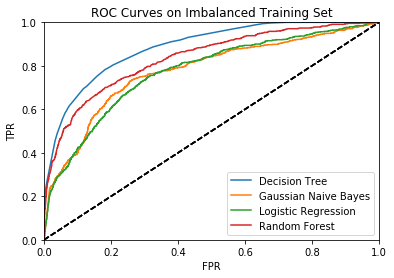

In [36]:
# plot ROC curve for each model on imbalanced training set
roc_curve_plot(model_DT, X_imb, y_imb, label='Decision Tree')
roc_curve_plot(model_GNB, X_imb, y_imb, label='Gaussian Naive Bayes')
roc_curve_plot(model_LR, X_imb, y_imb, label='Logistic Regression')
roc_curve_plot(model_RF, X_imb, y_imb, label='Random Forest')
plt.title('ROC Curves on Imbalanced Training Set')
plt.legend(loc='lower right')

AUC score of Decision Tree is 0.7494.
AUC score of Gaussian Naive Bayes is 0.7316.
AUC score of Logistic Regression is 0.7279.
AUC score of Random Forest is 0.7818.


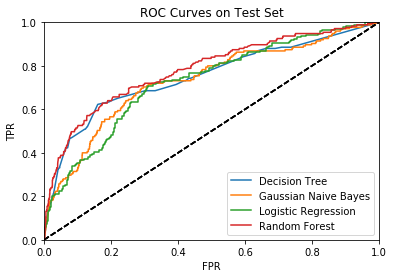

In [37]:
# plot ROC curve for each model on test dataset
roc_curve_plot(model_DT, X_test, y_test, label='Decision Tree')
roc_curve_plot(model_GNB, X_test, y_test, label='Gaussian Naive Bayes')
roc_curve_plot(model_LR, X_test, y_test, label='Logistic Regression')
roc_curve_plot(model_RF, X_test, y_test, label='Random Forest')
plt.title('ROC Curves on Test Set')
plt.legend(loc='lower right')

AUC score of Decision Tree is 0.8577.
AUC score of Gaussian Naive Bayes is 0.7498.
AUC score of Logistic Regression is 0.7458.
AUC score of Random Forest is 0.8029.


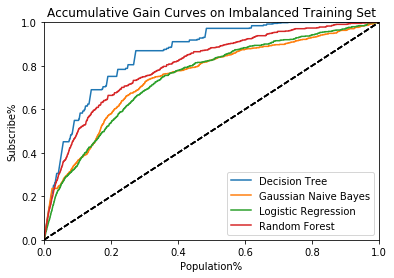

In [38]:
# Accumulative Lift Curves graph on imbalanced training set
lift_DT_imb = lift_input(model_DT, X_imb, y_imb)
gain_plot(lift_DT_imb, label='Decision Tree')
lift_GNB_imb = lift_input(model_GNB, X_imb, y_imb)
gain_plot(lift_GNB_imb, label='Gaussian Naive Bayes')
lift_LR_imb = lift_input(model_LR, X_imb, y_imb)
gain_plot(lift_LR_imb, label='Logistic Regression')
lift_RF_imb = lift_input(model_RF, X_imb, y_imb)
gain_plot(lift_RF_imb, label='Random Forest')
plt.title('Accumulative Gain Curves on Imbalanced Training Set')
plt.legend(loc='lower right')

AUC score of Decision Tree is 0.7488.
AUC score of Gaussian Naive Bayes is 0.7081.
AUC score of Logistic Regression is 0.7034.
AUC score of Random Forest is 0.7519.


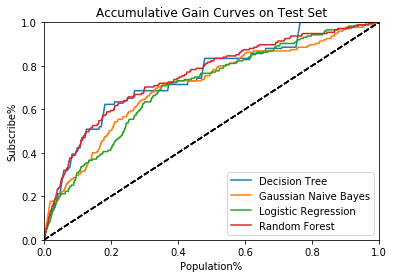

In [39]:
# Accumulative Lift Curves graph on test dataset
lift_DT = lift_input(model_DT, X_test, y_test)
gain_plot(lift_DT, label='Decision Tree')
lift_GNB = lift_input(model_GNB, X_test, y_test)
gain_plot(lift_GNB, label='Gaussian Naive Bayes')
lift_LR = lift_input(model_LR, X_test, y_test)
gain_plot(lift_LR, label='Logistic Regression')
lift_RF = lift_input(model_RF, X_test, y_test)
gain_plot(lift_RF, label='Random Forest')
plt.title('Accumulative Gain Curves on Test Set')
plt.legend(loc='lower right')

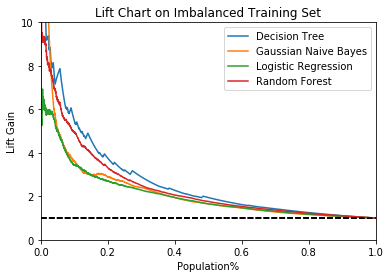

In [40]:
# create lift gain chart on training set
lift_chart_DT_imb = lift_chart(lift_DT_imb, label='Decision Tree')
lift_chart_GNB_imb = lift_chart(lift_GNB_imb, label='Gaussian Naive Bayes')
lift_chart_LR_imb = lift_chart(lift_LR_imb, label='Logistic Regression')
lift_chart_RF_imb = lift_chart(lift_RF_imb, label='Random Forest')
plt.title('Lift Chart on Imbalanced Training Set')
plt.legend(loc='upper right')

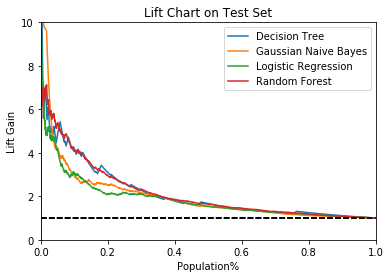

In [41]:
# create lift gain chart on test set
lift_chart_DT = lift_chart(lift_DT, label='Decision Tree')
lift_chart_GNB = lift_chart(lift_GNB, label='Gaussian Naive Bayes')
lift_chart_LR = lift_chart(lift_LR, label='Logistic Regression')
lift_chart_RF = lift_chart(lift_RF, label='Random Forest')
plt.title('Lift Chart on Test Set')
plt.legend(loc='upper right')

# Final Model Optimization and Evalution

In [44]:
# further fine tune decision tree model
parameters_DT_impv = {'criterion':['gini','entropy'], 
                      'splitter':['best','random'],
                      'max_depth': [5,6,7],
                      'min_samples_leaf': [2,3],
                      'min_samples_split': [2,3],
                      'max_features': [None,'auto','sqrt','log2'],
                      'class_weight': [None,'balanced'],
                      'presort': [True,False]
                     }

model_DT_impv = fit_classifier(DecisionTreeClassifier(random_state=66), X_train, y_train, 
                          parameters=parameters_DT_impv, scorer_metrics=recall_score)




Model performance on training set
------------------------
Final accuracy score on the training data: 0.7798
Final precision score on training data: 0.7831
Final Recall score on training data: 0.7781
Final ROC AUC score on training data: 0.7798


The best parameters are: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=True, random_state=66,
            splitter='best')


In [45]:
# Improved Decision Tree model performance on test dataset
y_test_DT_impv = classifier_test(model_DT_impv, X_test, y_test)




Model performance on test set
------------------------
Final accuracy score on the testing data: 0.7770
Final precision score on testing data: 0.2796
Final Recall score on testing data: 0.6667
Final ROC AUC score on testing data: 0.7286


In [46]:
# save the model to current directory
joblib.dump(model_DT_impv, 'saved_models/Decision_Tree_model_impv_2.pkl')

['saved_models/Decision_Tree_model_impv_2.pkl']

In [47]:
# load saved models
model_DT_impv2 = joblib.load('saved_models/Decision_Tree_model_impv_2.pkl')

AUC score of Decision Tree is 0.8608.
AUC score of Decision Tree - Improved is 0.8390.
AUC score of Decision Tree - Improved II is 0.8390.
AUC score of Gaussian Naive Bayes is 0.7358.


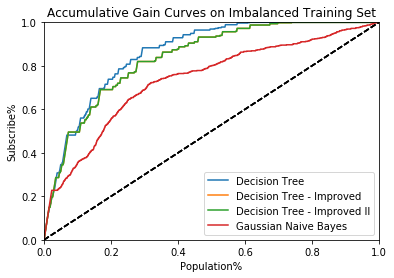

In [48]:
# Accumulative Lift Curves graph for improved Decision Tree model on imbalance dataset
lift_DT_imb = lift_input(model_DT, X_imb, y_imb)
gain_plot(lift_DT_imb, label='Decision Tree')
lift_DT_impv_imb = lift_input(model_DT_impv, X_imb, y_imb)
gain_plot(lift_DT_impv_imb, label='Decision Tree - Improved')
lift_DT_impv2_imb = lift_input(model_DT_impv2, X_imb, y_imb)
gain_plot(lift_DT_impv2_imb, label='Decision Tree - Improved II')
lift_GNB_imb = lift_input(model_GNB, X_imb, y_imb)
gain_plot(lift_GNB_imb, label='Gaussian Naive Bayes')
plt.title('Accumulative Gain Curves on Imbalanced Training Set')
plt.legend(loc='lower right')

AUC score of Decision Tree is 0.7643.
AUC score of Decision Tree - Improved (Final) is 0.7551.
AUC score of Decision Tree - Improved II is 0.7551.
AUC score of Gaussian Naive Bayes is 0.7517.


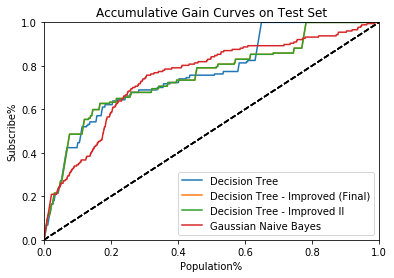

In [49]:
# Accumulative Lift Curves graph for improved Decision Tree model on test set
lift_DT = lift_input(model_DT, X_test, y_test)
gain_plot(lift_DT, label='Decision Tree')
lift_DT_impv = lift_input(model_DT_impv, X_test, y_test)
gain_plot(lift_DT_impv, label='Decision Tree - Improved (Final)')
lift_DT_impv2 = lift_input(model_DT_impv2, X_test, y_test)
gain_plot(lift_DT_impv2, label='Decision Tree - Improved II')
lift_GNB = lift_input(model_GNB, X_test, y_test)
gain_plot(lift_GNB, label='Gaussian Naive Bayes')
plt.title('Accumulative Gain Curves on Test Set')
plt.legend(loc='lower right')

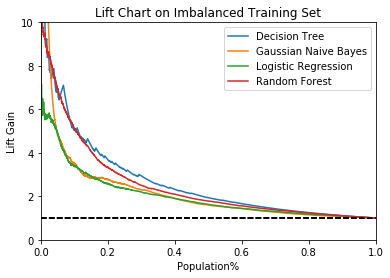

In [50]:
lift_chart_DT_imb = lift_chart(lift_DT_imb, label='Decision Tree')
lift_chart_GNB_imb = lift_chart(lift_GNB_imb, label='Gaussian Naive Bayes')
lift_chart_LR_imb = lift_chart(lift_LR_imb, label='Logistic Regression')
lift_chart_RF_imb = lift_chart(lift_RF_imb, label='Random Forest')
plt.title('Lift Chart on Imbalanced Training Set')
plt.legend(loc='upper right')

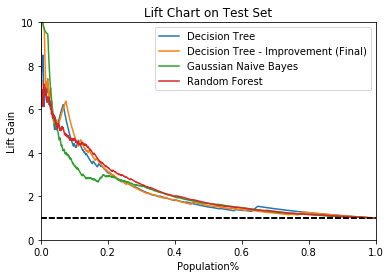

In [51]:
# create lift gain chart for improved models
lift_chart_DT = lift_chart(lift_DT, label='Decision Tree')
lift_chart_DT_impv = lift_chart(lift_DT_impv, label='Decision Tree - Improvement (Final)')
lift_chart_GNB = lift_chart(lift_GNB, label='Gaussian Naive Bayes')
lift_chart_RF = lift_chart(lift_RF, label='Random Forest')
plt.title('Lift Chart on Test Set')
plt.legend(loc='upper right')

AUC score of Decision Tree is 0.8940.
AUC score of Decision Tree - Improved (Final) is 0.8663.
AUC score of Gaussian Naive Bayes is 0.7600.
AUC score of Random Forest is 0.8478.


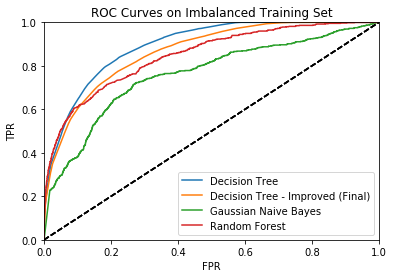

In [52]:
# plot ROC curve for improved model on imbalanced training set
roc_curve_plot(model_DT, X_imb, y_imb, label='Decision Tree')
roc_curve_plot(model_DT_impv, X_imb, y_imb, label='Decision Tree - Improved (Final)')
roc_curve_plot(model_GNB, X_imb, y_imb, label='Gaussian Naive Bayes')
roc_curve_plot(model_RF, X_imb, y_imb, label='Random Forest')
plt.title('ROC Curves on Imbalanced Training Set')
plt.legend(loc='lower right')

AUC score of Decision Tree is 0.7554.
AUC score of Decision Tree - Improved (Final) is 0.7611.
AUC score of Gaussian Naive Bayes is 0.7808.
AUC score of Random Forest is 0.8138.


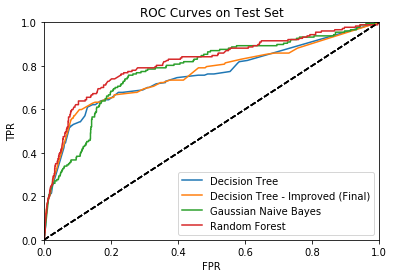

In [53]:
# plot ROC curve for improved model on test set
roc_curve_plot(model_DT, X_test, y_test, label='Decision Tree')
roc_curve_plot(model_DT_impv, X_test, y_test, label='Decision Tree - Improved (Final)')
roc_curve_plot(model_GNB, X_test, y_test, label='Gaussian Naive Bayes')
roc_curve_plot(model_RF, X_test, y_test, label='Random Forest')
plt.title('ROC Curves on Test Set')
plt.legend(loc='lower right')

In [54]:
# save final model to local disk
joblib.dump(model_DT_impv, 'saved_models/Final_model.pkl')

['saved_models/Final_model.pkl']

# Confusion Matrix Analysis


Confusion matrix

Example of confusion matrix usage to evaluate the quality
of the output of a classifier on the iris data set. The
diagonal elements represent the number of points for which
the predicted label is equal to the true label, while
off-diagonal elements are those that are mislabeled by the
classifier. The higher the diagonal values of the confusion
matrix the better, indicating many correct predictions.

The figures show the confusion matrix with and without
normalization by class support size (number of elements
in each class). This kind of normalization can be
interesting in case of class imbalance to have a more
visual interpretation of which class is being misclassified.

Here the results are not as good as they could be as our
choice for the regularization parameter C was not the best.
In real life applications this parameter is usually chosen
using :ref:`grid_search`.


Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion

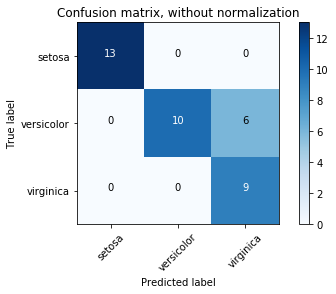

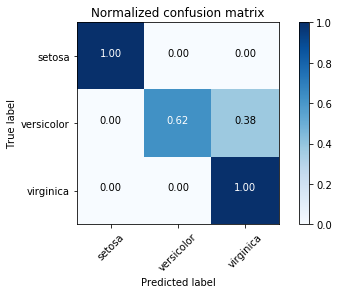

Normalized confusion matrix
[[ 0.85  0.15]
 [ 0.38  0.62]]


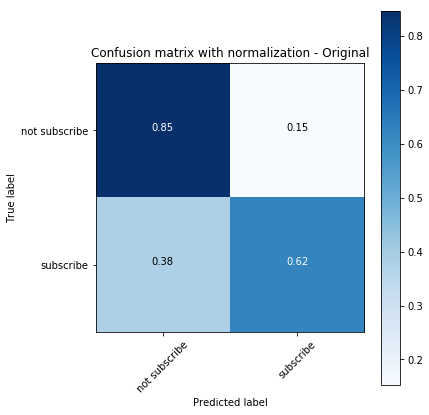

In [55]:
# marketing simulation with 20% client contact budget and confusion matrix analysis
from sklearn.metrics import confusion_matrix
from confusion_matrix_plot_module import plot_confusion_matrix # This is a function downloaded from 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

# make predictions on test set with original DT model
y_pred_DT = y_predict_threshold(model_DT, X_test, y_test, 0.2)

# create confusion matrix
confusion_matrix_DT = confusion_matrix(y_test, y_pred_DT)

# plot confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(confusion_matrix_DT, normalize=True, classes=['not subscribe','subscribe'],
                      title='Confusion matrix with normalization - Original')

Normalized confusion matrix
[[ 0.85  0.15]
 [ 0.38  0.62]]


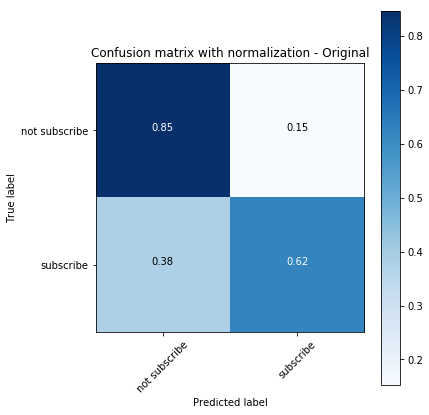

In [56]:
# marketing simulation with 20% client contact budget and confusion matrix analysis
from sklearn.metrics import confusion_matrix
import confusion_matrix_plot_module # This is a function downloaded from 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

# make predictions on test set with original DT model
y_pred_DT = y_predict_threshold(model_DT, X_test, y_test, 0.2)

# create confusion matrix
confusion_matrix_DT = confusion_matrix(y_test, y_pred_DT)

# plot confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(confusion_matrix_DT, normalize=True, classes=['not subscribe','subscribe'],
                      title='Confusion matrix with normalization - Original')

Normalized confusion matrix
[[ 0.85  0.15]
 [ 0.42  0.58]]


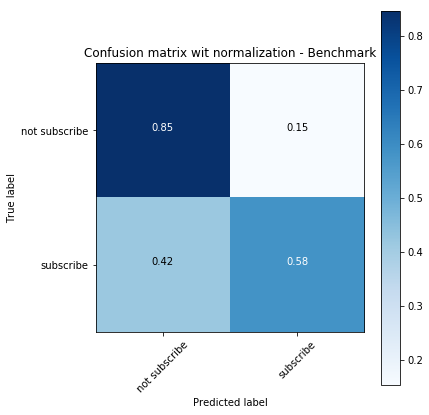

In [57]:
# plot confusion matrix on benchmark model
# make predictions on test set
y_pred_GNB = y_predict_threshold(model_GNB, X_test, y_test, 0.2)

# create confusion matrix
confusion_matrix_GNB = confusion_matrix(y_test, y_pred_GNB)
plt.figure(figsize=(6,6))
plot_confusion_matrix(confusion_matrix_GNB, normalize=True, classes=['not subscribe','subscribe'],
                      title='Confusion matrix wit normalization - Benchmark')

# Free-Form Visualization

AUC score of Decision Tree (AUC = 0.7958) is 0.7551.
AUC score of Benchmark Model (AUC = 0.7422) is 0.7517.


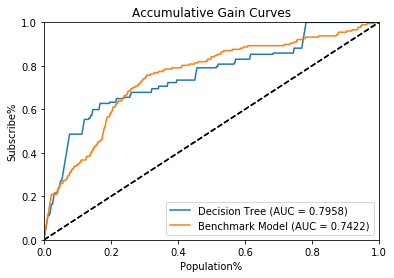

In [58]:
# Visualization showing the improvement of final model vs benchmark model
gain_plot(lift_DT_impv, label='Decision Tree (AUC = 0.7958)')
gain_plot(lift_GNB, label='Benchmark Model (AUC = 0.7422)' )
plt.title('Accumulative Gain Curves')
plt.legend(loc='lower right')

In [59]:
# quantitative comparison - final model vs benchmark
print('Sample Size  Decision Tree   Gaussian Naive Bayes')
for i in range(1,10):
    decile = i*10
    decile_DT = lift_DT_impv[0][int(len(lift_DT_impv[0])*i*0.1)]*100
    decile_GNB = lift_GNB[0][int(len(lift_GNB[0])*i*0.1)]*100
    print('%d%%          %.1f%%             %.1f%%' % (decile, decile_DT, decile_GNB))

Sample Size  Decision Tree   Gaussian Naive Bayes
10%          48.6%             34.5%
20%          63.3%             58.2%
30%          67.8%             74.0%
40%          73.4%             79.1%
50%          79.1%             84.2%
60%          83.1%             88.7%
70%          85.9%             89.3%
80%          100.0%             93.2%
90%          100.0%             95.5%


Top 10 features contribute to 92.5% of the final mode.


Text(0,0.5,'Importance Contribution %')

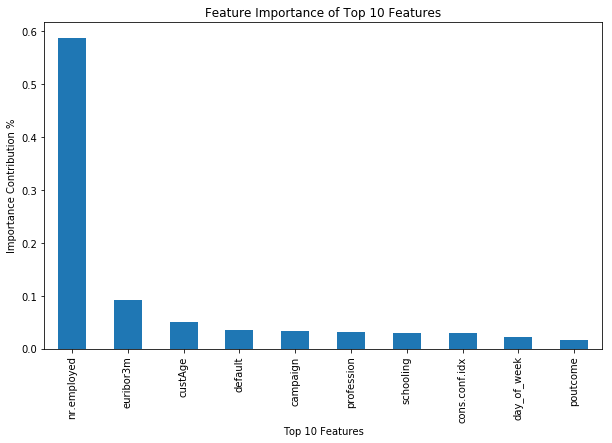

In [60]:
# visualize the feature importance of final model

# create series of feature importance of final model
series_feature = pd.Series(index=X_train.columns, data=model_DT_impv.feature_importances_.reshape(20,))

# combine the feature importance value of onehotencoded categorical features back to original feature list

feature_dict={} # create empty dictionary with keys defined
for i in train_processed.columns[:-1]:
    feature_dict[i]=0


# combine feature importance
for i in series_feature.index:
    for j in feature_dict.keys():
        if j in i:
            feature_dict[j]+=series_feature[i]
        else:
            continue

series_feature = pd.Series(feature_dict) # convert dictionary to Series
feature_sort = series_feature.sort_values(ascending=False) # Descending sort of feature importance
# calculate gross contribution
print('Top 10 features contribute to %.1f%% of the final mode.' % sum(feature_sort[0:10]*100))
feature_sort[0:10].plot.bar(figsize = (10, 6))
plt.title('Feature Importance of Top 10 Features')
plt.xlabel('Top 10 Features')
plt.ylabel('Importance Contribution %')

# Creat a linear regression function for profit

In [42]:
dataset = pd.read_csv('DataTraining.csv')
train_data=dataset.replace("unknown",np.nan)

train_data=train_data.replace("no",0)
train_data=train_data.replace("yes",1)

train_data.pop("id")


train_data.pop('pdays');
train_processed = preprocess_data(train_data,1)
train_processed.default[train_processed.default.isnull()]=1
train_processed.pop('responded')
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['custAge', 'campaign', 'pmonths', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
             'euribor3m', 'nr.employed']

train_processed[numerical] = scaler.fit_transform(train_processed[numerical])
train_processed = pd.get_dummies(train_processed)
train_processed = shuffle(train_processed)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [43]:
from sklearn.utils import shuffle  

# train_data2_processed.pop('responded')
mdrop = train_processed.profit[train_processed.profit.isnull()]
train_processed = train_processed.drop(mdrop.index)

X_train = train_processed.values.astype(np.float)[0:700, :20]
y_train = train_processed.values.astype(np.float)[0:700, 20]
X_test = train_processed.values.astype(np.float)[700:827, :20]
y_test = train_processed.values.astype(np.float)[700:827, 20]
print( X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(700, 20) (700,) (127, 20) (127,)


In [44]:
from sklearn import linear_model
regr = linear_model.LinearRegression(fit_intercept=False)
# regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.797265269406


R^2的值为80.0%，准确率可以接受，接下来根据上面Random Forest的模型先对responded分类，然后再对所有用户的profit做回归。

# deal with test set

预测所有人的profit,预测是否responded

In [45]:
test_processed.default[test_processed.default.isnull()]=1
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['custAge', 'campaign', 'pmonths', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
             'euribor3m', 'nr.employed']

test_processed[numerical] = scaler.fit_transform(test_processed[numerical])
test_processed = pd.get_dummies(test_processed)
test_processed = shuffle(test_processed)

y_test_profit = regr.predict(test_processed.iloc[:,:])


X_test = test_processed.iloc[:,:]
y_test_responded= model_RF.predict(X_test)
y_test_responded

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1,

# Get the largest profit -- 本方法在testing data上的最优解

In [46]:
test_processed.insert(20,'responded',y_test_responded)
test_processed
a = np.asarray(y_test_responded)
Profit = a*y_test_profit + (-30)
market = (Profit>=0)
test_processed.insert(21,'profit',y_test_profit)
test_processed.insert(22,'market',market)
test_processed.to_csv('result/test_output_2.csv', index=False)
np.sum(Profit[Profit>0])

44526.263314236377

The largest profit is : 44526.263314236377.

# Finished !!!
# ----------------------------------------------------------------------------------------------------------------

# 跟training set中真实的最大profit作比较：

In [47]:
dataset = pd.read_csv('DataTraining.csv')
dataset.profit[dataset.profit.isnull()]=0
ll=dataset.iloc[:,-2]

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
dataset = pd.read_csv('DataTraining.csv')
train_data=dataset.replace("unknown",np.nan)

train_data=train_data.replace("no",0)
train_data=train_data.replace("yes",1)

train_data.pop("id")


train_data.pop('pdays');
train_processed = preprocess_data(train_data,1)
train_processed.default[train_processed.default.isnull()]=1
train_processed.pop('responded')
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['custAge', 'campaign', 'pmonths', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
             'euribor3m', 'nr.employed']

train_processed[numerical] = scaler.fit_transform(train_processed[numerical])

y_test_profit1 = regr.predict(train_processed.iloc[:,:-1])
y_test_responded1 = model_RF.predict(train_processed.iloc[:,:-1])


C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


# 本方法（先分是否responded，再回归profit）在training data上的最优解：

In [49]:
a1 = np.asarray(y_test_responded1)
Profit1 = a1*y_test_profit1 + (-30)
np.sum(Profit1[Profit1>0])

380796.4496923422

# 方法一（直接根据是否market粗暴分类）在training data 上的最优解：

In [50]:
df = pd.read_csv('result/df_1.csv')
a2 = np.asarray(df.iloc[:,22])
Profit2 = a2*y_test_profit1 + a2*(-30)
np.sum(Profit2[Profit2>0])

247240.76901359035

# training data的真实profit

In [51]:
df = pd.read_csv('DataTraining.csv')
df=df.replace("no",0)
df=df.replace("yes",1)
df=df.replace(np.nan,0)
a3 = np.asarray(df.iloc[:,-3])
Profit3 = a3*df.iloc[:,-2] + a3* (-30)

np.sum(Profit3[Profit3>0])

127879.0

# 方法一在 testing data上的最优解：

In [52]:
df = pd.read_csv('result/test_output_1.csv')
a3 = np.asarray(df.iloc[:,20])
Profit3 = a3*y_test_profit + a3*(-30)
np.sum(Profit3[Profit3>0])

31923.077901947679

# 因此我们选择本方法，即：先分析responded，然后再根据回归预测每个人的profit，最终标记market的用户。